In [4]:
!pip install --upgrade pip --user
!pip install imutils
!pip install opencv-python


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

In [6]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [7]:
imagePaths = sorted(list(paths.list_images('train')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

0


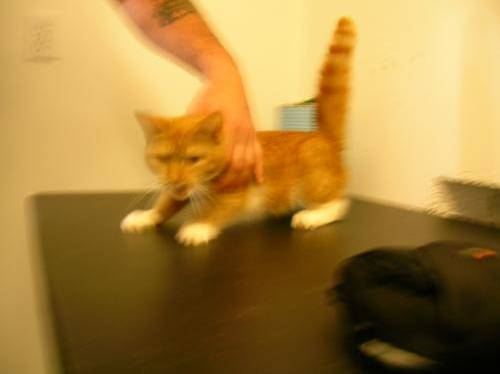

In [9]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])
Image(filename=imagePaths[0])


In [12]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state=2)

In [13]:
model = LinearSVC(random_state = 2, C = 0.94)
model.fit(trainData, trainLabels)

LinearSVC(C=0.94, random_state=2)

In [14]:
predictions = model.predict(testData)

In [15]:
print(classification_report(testLabels, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

         cat       0.56      0.72      0.63       121
         dog       0.65      0.48      0.55       129

    accuracy                           0.60       250
   macro avg       0.61      0.60      0.59       250
weighted avg       0.61      0.60      0.59       250



In [60]:
from sklearn.metrics import f1_score
predictions = model.predict(testData)
probability = f1_score(testLabels, predictions, average='macro')

In [24]:
model.coef_[0][440]

0.0

In [61]:
singleImage = cv2.imread('test/dog.1050.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)

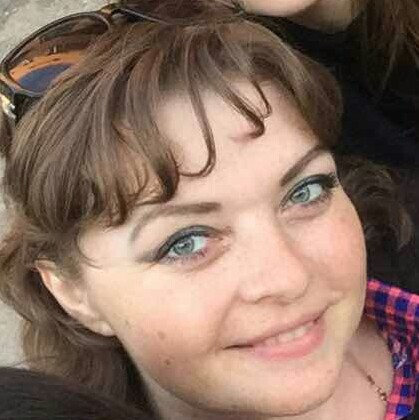

In [62]:
Image(filename='test/dog.1050.jpg')

In [67]:
if prediction == [1]:
    print('С вероятностью '+str(round(probability, 2)*100)+' % Это собака')
else:
    print('С вероятностью '+str(round(probability, 2)*100)+ ' % Это кошка')

С вероятностью 59.0 % Это собака


## С вероятностью 59.0 % Это собака